#Data Importing

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 3.5MB/s 


In [ ]:
import sys
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import Sastrawi
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train_path = '/content/drive/My Drive/Permutasi UGM 2020 (Pi=e=3)/Data_A_UKARA/data_train_A.csv'
valid_path = '/content/drive/My Drive/Permutasi UGM 2020 (Pi=e=3)/Data_A_UKARA/data_dev_A.csv'
test_path = '/content/drive/My Drive/Permutasi UGM 2020 (Pi=e=3)/Data_A_UKARA/data_test_A.csv'

In [21]:
df_train = pd.read_csv(train_path, header=0)
df_valid = pd.read_csv(valid_path, header=0)
df_test = pd.read_csv(test_path, header=0)

In [22]:
df_train.head()

,RES_ID,RESPONSE,LABEL
0,TRA1,intetraksi/beradaptasi terhadap lingkungan yan...,1
1,TRA2,seperti jatuhnya meteor tsunami gempa bumi,0
2,TRA3,hanya tuhan yang tahu tantangan nya itu apaan,0
3,TRA4,mereka akan sulit beradaptasi,1
4,TRA5,"Tempat tinggal, ekonomi, dan pekerjaan",1


In [8]:
df_valid.head()

,RES_ID,RESPONSE,LABEL
0,DEVA1,karena di tempat tnggalnya tidak aman karena b...,0
1,DEVA2,"banyak yang menolak, susah mencari lapangan pe...",1
2,DEVA3,ah berkomunikasi dengan wilyah yang mereka tem...,1
3,DEVA4,"tantangan yang akan mereka hadapi, seperti mer...",1
4,DEVA5,Mereka akan tidak terbiasa dengan tempat baru,1


In [9]:
df_test.head()

,RES_ID,RESPONSE,LABEL
0,TSA1,"beradaptasi dengan lingkunagn baru, lahan dan ...",1
1,TSA2,Pengungsi akan mencari mata pencaharian yang b...,1
2,TSA3,komunitas dan negaranya.,1
3,TSA4,mereka perlu menyesuaikan diri dan beradaptasi...,1
4,TSA5,TANTANGNNYA ADALAH KEBUTUHAN EKONOMI,1


#Data Preprocessing (Keras Embeeding)

##Data Train

In [10]:
vocab_size = 1500
embedding_dim = 16
max_length = 40
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [11]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [23]:
sentences = []
labels = []
stopwords = StopWordRemoverFactory().create_stop_word_remover()

In [24]:
print(stopwords)

In [25]:
sentences = df_train['RESPONSE']
labels = df_train['LABEL']

print(len(sentences))
print(len(labels))

268
268


In [15]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [16]:
stemmer = StemmerFactory().create_stemmer()

In [26]:
for i in range(0, len(sentences)):
  sentences[i] = stemmer.stem(sentences[i])
  sentences[i] = stopwords.remove(sentences[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
print(sentences)

0                intetraksi adaptasi hadap lingkung baru
1                        jatuh meteor tsunami gempa bumi
2                             tuhan tahu tantang nya apa
3                                    akan sulit adaptasi
4                           tempat tinggal ekonomi kerja
                             ...                        
263                    harus ajar adaptasi lingkung baru
264    salah satu tantang akan hadap ungsi iklim suli...
265    hadap lingkung mungkin akan perlu waktu yang l...
266    akan baur orang baru usaha terima budaya baru ...
267                                  cari tempat tinggal
Name: RESPONSE, Length: 268, dtype: object


In [28]:
train_sentences = sentences
train_labels = labels

print(len(train_sentences))
print(len(train_labels))

268
268


#Data Valid

In [29]:
validation_sentences = []
validation_labels = []

In [30]:
validation_sentences = df_valid['RESPONSE'].values
validation_labels = df_valid['LABEL'].values

print(len(validation_sentences))
print(len(validation_labels))

215
215


In [31]:
print(validation_sentences)

['karena di tempat tnggalnya tidak aman karena banyak kasusnya'
 'banyak yang menolak, susah mencari lapangan pekerjaan dan juga susah mendapatkan rumah yang layak di huni karena bisa terjadi penolakan dari negara lain terhadap pengungsian'
 'ah berkomunikasi dengan wilyah yang mereka tempati.'
 'tantangan yang akan mereka hadapi, seperti mereka harus mencari pekerjaan yang baru untuk mencukupi kehidupan mereka.'
 'Mereka akan tidak terbiasa dengan tempat baru'
 'kehilangan pekerjaan dan sumber daya yang ada di tempat lama'
 'dengan sikap yang tenang' 'Mencari tempat pengungsian'
 'cuaca/atau suasana di perjalanan'
 'Pengungsi iklim lingkungan baru yang berbeda dengan sebelumnya,mungkin akan terasa sulit untuk beradaptasi.'
 'Beradaptasi dengan lingkungan'
 'mereka akan kehilangan ladan mereka karena harus berpindah tempat tinggal.'
 'mereka meninggalkan sebuah kenangan yang sangat indah disana bersama keluarga .'
 'mereka akan meninggalkan tetengga meraka yg lama,dan mereka dpan tempa

In [32]:
for i in range(0, len(validation_sentences)):
  validation_sentences[i] = stemmer.stem(validation_sentences[i])
  validation_sentences[i] = stopwords.remove(validation_sentences[i])

In [33]:
print(len(validation_sentences))
print(len(validation_labels))

215
215


In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(np.hstack([train_sentences, validation_sentences]))
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)

print(len(train_sentences))
print(train_sentences.shape)
print(len(validation_sequences))
print(validation_sentences.shape)

268
(268,)
215
(215,)


In [35]:
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(train_padded.shape)
print(validation_padded.shape)

(268, 40)
(215, 40)


##Data Test

In [36]:
test_sentences = []
test_labels = []

In [37]:
test_sentences = df_test['RESPONSE'].values
test_labels = df_test['LABEL'].values

print(len(test_sentences))
print(len(test_labels))

855
855


In [38]:
print(test_sentences)

['beradaptasi dengan lingkunagn baru, lahan dan harta mereka yang dulu akan hilang, tertinggalnya teknologi karena bencana lingkunagn tersebut.'
 'Pengungsi akan mencari mata pencaharian yang baru karena mereka kehilangan lahan pertanian / matapencaharian'
 'komunitas dan negaranya.'
 'mereka perlu menyesuaikan diri dan beradaptasi dengan lingkungan yang baru.'
 'TANTANGNNYA ADALAH KEBUTUHAN EKONOMI'
 'Tantangan yang harus dihadapi adalah jika warga Travina harus berpindah tempat, mereka harus beradaptasi dengan tempat tinggal baru mereka mulai dari lahan pertanian untuk pekerjaan,bahan pangan dan lainnya.'
 'akan kesulitan mendapatkan lahan dan tempat tinggal'
 'susah beradaptasi... harus dapat menyesuaikan lingkungan nya'
 'salah satu yang terjadi adalah.....'
 'mengurangi dampak yang menyebabkan pemanasan global'
 'lahan lahan pertanian,rumah mereka terpaksa hilang karena harus meninggalkan wilayah yang dihuninya,warga mungkin belum terbiasa dengan tempat baru yang ditempatinya'
 'd

In [39]:
for i in range(0, len(test_sentences)):
  test_sentences[i] = stemmer.stem(str(test_sentences[i]))
  test_sentences[i] = stopwords.remove(str(test_sentences[i]))

In [41]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)

print(len(test_sentences))
print(test_padded.shape)

855
(855, 40)


#Modelling (TF-IDF)

##MLP

##LSTM

#Modelling (Keras Embeeding)

##MLP

In [44]:
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [43]:
prec = Precision(name='prec')
rec = Recall(name='rec')

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index)+1, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

boundaries = [50, 100]
values = [0.1, 0.05, 0.02]
learning_rate = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['acc',prec,rec])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          10848     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 11,281
Trainable params: 11,281
Non-trainable params: 0
_________________________________________________________________


In [51]:
hist = model.fit(train_padded, train_labels, epochs=200, validation_data=(validation_padded, validation_labels), verbose=2)

Epoch 1/200
9/9 - 0s - loss: 0.8912 - acc: 0.5821 - prec: 0.7597 - rec: 0.7994 - val_loss: 0.5724 - val_acc: 0.7116 - val_prec: 0.7116 - val_rec: 1.0000
Epoch 2/200
9/9 - 0s - loss: 0.5098 - acc: 0.6903 - prec: 0.7368 - rec: 0.8796 - val_loss: 0.8830 - val_acc: 0.7116 - val_prec: 0.7116 - val_rec: 1.0000
Epoch 3/200
9/9 - 0s - loss: 0.4729 - acc: 0.8358 - prec: 0.8551 - rec: 0.9267 - val_loss: 0.6402 - val_acc: 0.7395 - val_prec: 0.7366 - val_rec: 0.9869
Epoch 4/200
9/9 - 0s - loss: 0.4107 - acc: 0.8470 - prec: 0.8676 - rec: 0.9267 - val_loss: 0.5877 - val_acc: 0.7163 - val_prec: 0.7170 - val_rec: 0.9935
Epoch 5/200
9/9 - 0s - loss: 0.2645 - acc: 0.8918 - prec: 0.8971 - rec: 0.9581 - val_loss: 0.5257 - val_acc: 0.7674 - val_prec: 0.7725 - val_rec: 0.9542
Epoch 6/200
9/9 - 0s - loss: 0.2018 - acc: 0.9104 - prec: 0.9326 - rec: 0.9424 - val_loss: 0.4404 - val_acc: 0.8140 - val_prec: 0.9007 - val_rec: 0.8301
Epoch 7/200
9/9 - 0s - loss: 0.1639 - acc: 0.9328 - prec: 0.9626 - rec: 0.9424 - v

In [56]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
def plot_ax(axes, metrics, title, epochs):
    val_met = 'val_' + metrics
    axes.plot(hist.history[metrics], c='blue', linewidth=1.5)
    axes.plot(hist.history[val_met], c='orange', linewidth=1.5)
    axes.set_title(title)
    axes.set_xticks(range(0, epochs, epochs // 10))
    axes.legend([metrics, val_met], loc='best')
    axes.set_ylabel(metrics)
    axes.grid()

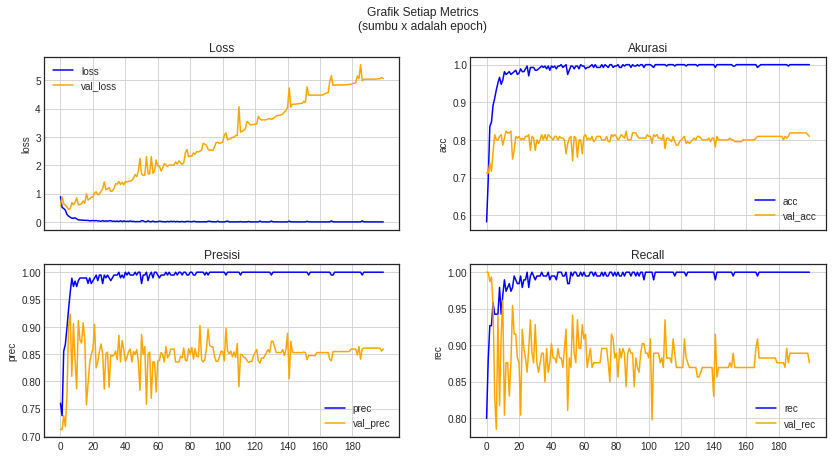

In [57]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(20, 10))
fig.set_size_inches(14., 7.)
plot_ax(ax[0][0], 'loss', 'Loss', 200)
plot_ax(ax[0][1], 'acc', 'Akurasi', 200)
plot_ax(ax[1][0], 'prec', 'Presisi', 200)
plot_ax(ax[1][1], 'rec', 'Recall', 200)
fig = plt.gcf()
plt.suptitle('Grafik Setiap Metrics\n(sumbu x adalah epoch)')
plt.show()

In [58]:
pred = model.predict(test_padded)
pred = [[1 if i == max(sc) else 0 for i in sc] for sc in pred]

In [59]:
print("Accuracy pada test data:", accuracy_score(test_labels, pred))

Accuracy pada test data: 0.7134502923976608


In [60]:
print("Precision pada test data:", precision_score(test_labels, pred))

Precision pada test data: 0.7134502923976608


In [61]:
print("Recall pada test data:", recall_score(test_labels, pred))

Recall pada test data: 1.0


In [62]:
print("F1-score pada test data:", f1_score(test_labels, pred))

F1-score pada test data: 0.832764505119454


##LSTM

In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index)+1, embedding_dim),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['acc',prec,rec])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          10848     
_________________________________________________________________
lstm (LSTM)                  (None, 50)                13400     
_________________________________________________________________
dense_6 (Dense)              (None, 24)                1224      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 25,497
Trainable params: 25,497
Non-trainable params: 0
_________________________________________________________________


In [64]:
hist = model.fit(train_padded, train_labels, epochs=200, validation_data=(validation_padded, validation_labels), verbose=2)

Epoch 1/200
9/9 - 1s - loss: 0.7946 - acc: 0.6343 - prec: 0.7649 - rec: 0.8605 - val_loss: 0.6170 - val_acc: 0.6977 - val_prec: 0.7075 - val_rec: 0.9804
Epoch 2/200
9/9 - 0s - loss: 0.6122 - acc: 0.7127 - prec: 0.7127 - rec: 1.0000 - val_loss: 0.6062 - val_acc: 0.7116 - val_prec: 0.7116 - val_rec: 1.0000
Epoch 3/200
9/9 - 0s - loss: 0.6286 - acc: 0.7127 - prec: 0.7127 - rec: 1.0000 - val_loss: 0.6062 - val_acc: 0.7116 - val_prec: 0.7116 - val_rec: 1.0000
Epoch 4/200
9/9 - 0s - loss: 0.6059 - acc: 0.7127 - prec: 0.7127 - rec: 1.0000 - val_loss: 0.6214 - val_acc: 0.7116 - val_prec: 0.7116 - val_rec: 1.0000
Epoch 5/200
9/9 - 0s - loss: 0.6068 - acc: 0.7127 - prec: 0.7127 - rec: 1.0000 - val_loss: 0.6297 - val_acc: 0.7116 - val_prec: 0.7116 - val_rec: 1.0000
Epoch 6/200
9/9 - 0s - loss: 0.6120 - acc: 0.7127 - prec: 0.7127 - rec: 1.0000 - val_loss: 0.6074 - val_acc: 0.7116 - val_prec: 0.7116 - val_rec: 1.0000
Epoch 7/200
9/9 - 0s - loss: 0.6118 - acc: 0.7127 - prec: 0.7127 - rec: 1.0000 - v

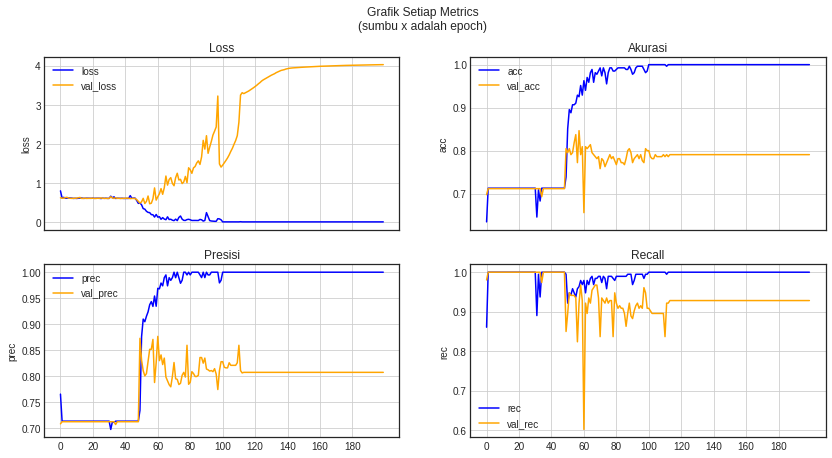

In [65]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(20, 10))
fig.set_size_inches(14., 7.)
plot_ax(ax[0][0], 'loss', 'Loss', 200)
plot_ax(ax[0][1], 'acc', 'Akurasi', 200)
plot_ax(ax[1][0], 'prec', 'Presisi', 200)
plot_ax(ax[1][1], 'rec', 'Recall', 200)
fig = plt.gcf()
plt.suptitle('Grafik Setiap Metrics\n(sumbu x adalah epoch)')
plt.show()

In [66]:
pred = model.predict(test_padded)
pred = [[1 if i == max(sc) else 0 for i in sc] for sc in pred]

In [67]:
print("Accuracy pada test data:", accuracy_score(test_labels, pred))

Accuracy pada test data: 0.7134502923976608


In [68]:
print("Precision pada test data:", precision_score(test_labels, pred))

Precision pada test data: 0.7134502923976608


In [69]:
print("Recall pada test data:", recall_score(test_labels, pred))

Recall pada test data: 1.0


In [70]:
print("F1-score pada test data:", f1_score(test_labels, pred))

F1-score pada test data: 0.832764505119454


#Modelling (fastText)

##MLP

##LSTM